In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
!pip install ydata-profiling
from ydata_profiling import ProfileReport
from google.colab import drive
drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2d580f2e9808c4d028e638463cf21a07f49097a8da01eb75d56355b4052f8e4c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 1. Read and profile the red-wine.csv data
red_wine = pd.read_csv('/content/drive/Shareddrives/is/733_data mining/hw2/red_wine.csv')

In [4]:
profile = ProfileReport(red_wine, title="Red Wine Data Profiling Report")
profile.to_file("/content/drive/Shareddrives/is/733_data mining/hw2/red_wine_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00, 36.08it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Display basic information about the dataset
print("Red Wine Dataset Shape:", red_wine.shape)
print("\nRed Wine Dataset Preview:")
print(red_wine.head())
print("\nRed Wine Dataset Summary Statistics:")
print(red_wine.describe())
print("\nRed Wine Class Distribution:")
print(red_wine['type'].value_counts())


Red Wine Dataset Shape: (571, 4)

Red Wine Dataset Preview:
   citric acid  sulphates  alcohol  type
0         0.49       0.63      8.0   low
1         0.66       0.57      8.3   low
2         0.23       0.44      8.5  high
3         0.44       0.84      8.6   low
4         0.08       0.50      8.7   low

Red Wine Dataset Summary Statistics:
       citric acid   sulphates     alcohol
count   571.000000  571.000000  571.000000
mean      0.324676    0.588161   10.776883
std       0.175103    0.188478    1.092562
min       0.000000    0.250000    8.000000
25%       0.240000    0.450000    9.900000
50%       0.330000    0.570000   10.800000
75%       0.440000    0.710000   11.600000
max       1.000000    2.000000   12.800000

Red Wine Class Distribution:
type
high    302
low     269
Name: count, dtype: int64


In [6]:
red_wine.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [7]:
# 2. Fit models and perform 10-fold cross-validation
# Prepare the features and target
X = red_wine[['citric acid', 'sulphates', 'alcohol']]
y = red_wine['type']
y_binary = (y == 'high').astype(int)  # Convert to binary for ROC AUC calculation

In [8]:
# Setup cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [9]:
# Initialize models
models = {
    'Baseline': DummyClassifier(strategy='most_frequent'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear', probability=True),
    'SVM-RBF': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

In [10]:
# Results storage
results = {}

In [11]:
# Perform cross-validation for each model
for name, model in models.items():
    # Use cross_validate to get both accuracy and AUC
    cv_results = cross_validate(model, X, y_binary, cv=cv,
                               scoring=['accuracy', 'roc_auc'],
                               return_train_score=False)

In [12]:
# Store mean results
results[name] = {
        'AUC': np.mean(cv_results['test_roc_auc']),
        'Accuracy': np.mean(cv_results['test_accuracy'])
    }

In [13]:
# Create a results DataFrame for easy viewing
results_df = pd.DataFrame(results).T
print("\nModel Performance (10-fold Cross-Validation):")
print(results_df)


Model Performance (10-fold Cross-Validation):
                    AUC  Accuracy
Random Forest  0.918259  0.836872


In [14]:
# prompt: can we get the auc and accuracy for all the models like
# Logistic
# Regression
# Naive
# Bayes
# Decision
# Tree
# SVM-
# Linear
# SVM-RBF Random
# Forest

import pandas as pd
import numpy as np
# Store mean results
results[name] = {
        'AUC': np.mean(cv_results['test_roc_auc']),
        'Accuracy': np.mean(cv_results['test_accuracy'])
    }
# Create a results DataFrame for easy viewing
results_df = pd.DataFrame(results).T
print("\nModel Performance (10-fold Cross-Validation):")
results_df



Model Performance (10-fold Cross-Validation):


,AUC,Accuracy
Random Forest,0.918259,0.836872


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Assuming 'red_wine' DataFrame is already loaded
if 'red_wine' not in locals():
    raise ValueError("Dataset 'red_wine' is not defined. Load the dataset before running.")

# Prepare the features and target
X = red_wine[['citric acid', 'sulphates', 'alcohol']]
y = red_wine['type']
y_binary = (y == 'high').astype(int)  # Convert target to binary classification

# Setup cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize models
models = {
        'Baseline': DummyClassifier(strategy='most_frequent'),  # Baseline model

    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM-Linear': SVC(kernel='linear', probability=True),
    'SVM-RBF': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}

# Results storage
results = {}

# Perform cross-validation for each model
for name, model in models.items():
    cv_results = cross_validate(model, X, y_binary, cv=cv,
                               scoring=['accuracy', 'roc_auc'],
                               return_train_score=False)

    # Store results for the current model with rounded values
    results[name] = {
        'AUC': round(np.mean(cv_results['test_roc_auc']), 4),
        'Accuracy': round(np.mean(cv_results['test_accuracy']), 4)
    }

# Create a results DataFrame for easy viewing
results_df = pd.DataFrame(results).T

# Print results
print("\nModel Performance (10-fold Cross-Validation):")
print(results_df)



Model Performance (10-fold Cross-Validation):
                        AUC  Accuracy
Baseline             0.5000    0.5289
Logistic Regression  0.8758    0.7844
Naive Bayes          0.8933    0.8248
Decision Tree        0.8108    0.8125
SVM-Linear           0.8754    0.7931
SVM-RBF              0.8549    0.5358
Random Forest        0.9230    0.8456


In [16]:
# 3. Plot ROC curve for Random Forest
# Train the Random Forest model on the entire dataset
rf_model = RandomForestClassifier()
rf_model.fit(X, y_binary)
y_scores = rf_model.predict_proba(X)[:, 1]

In [17]:

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_binary, y_scores)
roc_auc = auc(fpr, tpr)

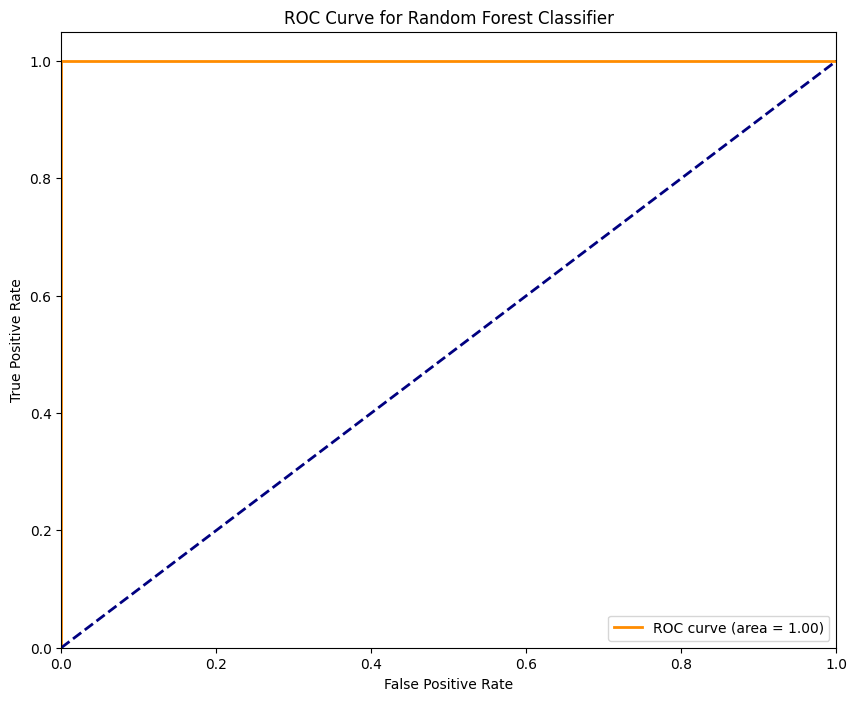

In [18]:
# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.savefig('random_forest_roc.png')
plt.show()

In [22]:
# 4. Apply the best model to white_wine.csv
# Read white wine dataset
white_wine = pd.read_csv('/content/drive/Shareddrives/is/733_data mining/hw2/white_wine.csv')
X_white = white_wine[['citric acid', 'sulphates', 'alcohol']]
y_white = white_wine['type']
y_white_binary = (y_white == 'high').astype(int)

In [20]:
# Find the best model (highest AUC)
best_model_name = results_df['AUC'].idxmax()
print(f"\nBest model: {best_model_name}")


Best model: Random Forest


In [21]:
best_model = models[best_model_name]
best_model.fit(X, y_binary)

RandomForestClassifier()

In [28]:
# Evaluate on white wine dataset
white_wine_score = roc_auc_score(y_white_binary, best_model.predict_proba(X_white)[:, 1])
print(f"AUC score on white wine dataset: {white_wine_score:.4f}")

AUC score on white wine dataset: 0.9634


In [29]:
# 5. Model selection for interpretability
# (This is a subjective response based on the models' interpretability properties)
print("\nModels suitable for gaining insights (interpretable models):")
interpretable_models = ["Decision Tree", "Logistic Regression", "Naive Bayes"]
for model in interpretable_models:
    print(f"- {model}")


Models suitable for gaining insights (interpretable models):
- Decision Tree
- Logistic Regression
- Naive Bayes
